# Исследование k-means кластеризации и ее вариаций

In [ ]:
import numpy as np
import scipy as py
%matplotlib inline
from matplotlib import pylab as plt
from sklearn.datasets import make_blobs

### Функция, генерирующая случайные точки вокруг заданных центров:

In [2]:
def make_blobs_my(n_samples, centers, random_state):
    np.random.seed(random_state)
    # Задаем координаты центров
    centers_x = np.random.rand(centers) * 7.0 # чем они выше, тем "скомконее" будут точки
    centers_y = np.random.rand(centers) * 12.0
    
    x = np.array([])
    y = np.array([])
    
    number = n_samples / centers
    error = n_samples % centers
    generations = []
    flag = 1
    for i in range(centers):
        if error == 0:
            flag = 0
        else:
            error -= 1
        generations.append(number + flag)
        
    colors = np.array([])
    for i in range(centers):
        x = np.append(x, (np.random.rand(generations[i]) + centers_x[i] - 0.5))
        y = np.append(y, (np.random.rand(generations[i]) + centers_y[i] - 0.5))
        colors = np.append(colors, [i] * generations[i])
    return [x, y], colors

### Функция генерации случайной выборки

In [3]:
def generate(n_samples, random_state):
    np.random.seed(random_state)
    X = np.array([], dtype = 'float')
    x = np.random.rand(n_samples) * 2 # x -> [0, 2] можно менять
    y = np.random.rand(n_samples) * 4 # y -> [0, 4] можно менять
    for i in range(len(x)):
        if i == 0:
            X = np.append(X, [x[i], y[i]])
        else:
            X = np.vstack([X, [x[i], y[i]]])
    return X

## Методы начальной инициализации

### RP (Randomly selected points)

In [4]:
def random(X, clusters, rd_seed):
    np.random.seed(rd_seed)
    centers_idx = np.array([], dtype = 'int')
    for i in range(clusters):
        new_idx = np.random.randint(0, len(X))
        while new_idx in centers_idx:
            new_idx = np.random.randint(0, len(X))
        centers_idx = np.append(centers_idx, new_idx)
    
    centers = np.array([0, 0], dtype = 'float')
    for i in range(len(centers_idx)):
        centers = np.vstack([centers, [X[centers_idx[i]][0], X[centers_idx[i]][1]]])
    centers = np.delete(centers, 0, axis = 0)
    return centers

### KMPP (k-means++)

In [5]:
def kmpp(X, clusters, rd_seed):
    np.random.seed(rd_seed)
    centers = np.array([0, 0], dtype = 'float')
    first_idx = np.random.randint(0, len(X))
    centers = np.vstack([centers, [X[first_idx][0], X[first_idx][1]]])
    centers = np.delete(centers, 0, axis = 0)
    
    for i in range(clusters - 1):
        distances = np.array([])
        for j in range(len(X)):
            tmp = np.array([np.abs(length([X[j][0], X[j][1]], [centers[k][0], centers[k][1]]))
                            for k in range(len(centers))], dtype = 'float')
            center_num = np.argmin(tmp) # индекс расстояния до ближайшего центра из уже выбранных
            distances = np.append(distances, tmp[center_num])
        rnd = np.random.rand(1) * np.sum(distances)
        new_center_idx = 0
        tmp_sum = 0
        while True:
            tmp_sum += distances[new_center_idx]
            if tmp_sum >= rnd:
                centers = np.vstack([centers, [X[new_center_idx][0], X[new_center_idx][1]]])
                break
            new_center_idx += 1
    return centers

## k-means

In [6]:
def length(dot, centre):
    return ((dot[0] - centre[0])**2 + (dot[1] - centre[1])**2) ** 0.5

In [7]:
def partition(X, centres):
    new_clusters = np.array([], dtype = 'int')
    for i in range(len(X)):
        tmp = np.array([length([X[i][0], X[i][1]], [centres[j][0], centres[j][1]]) 
                        for j in range(len(centres))], dtype = 'float')
        cluster_num = np.argmin(tmp)
        new_clusters = np.append(new_clusters, cluster_num) # номер кластера, к которому относится точка
    return new_clusters

In [8]:
def kmeans(X, n_clusters, random_state, method = random):
    iterations_cnt = 0
    
    centers = method(X, n_clusters, random_state)
        
    max_iterations = 100
    
    for i in range(max_iterations):
        iterations_cnt += 1
        clusters = partition(X, centers) # Образовали кластеры
       
        prev_centers = np.copy(centers)
            
        for j in range(len(centers)):
            summary_x = 0
            summary_y = 0
            for k in range(len(X)):
                if clusters[k] == j:
                    summary_x += X[k][0] 
                    summary_y += X[k][1]
            dim = sum(clusters[0:] == j)
            if dim > 0:
                centers[j][0] = summary_x / dim
                centers[j][1] = summary_y / dim
                
        if (np.array_equal(prev_centers, centers)):
            break
            
    return clusters, centers, iterations_cnt

## 1. Зависимость от стратегий начальной инициализации

In [9]:
X1, y1  = make_blobs(n_samples = 200, centers = 2, random_state = 0)
X2, y2 = make_blobs(n_samples = 600, centers = 5, random_state = 1)
X3 = generate(200, 2)
X4 = generate(600, 3)

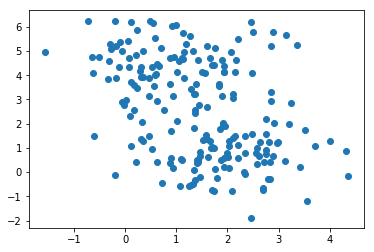

In [10]:
plt.scatter(X1[:, 0], X1[:, 1])

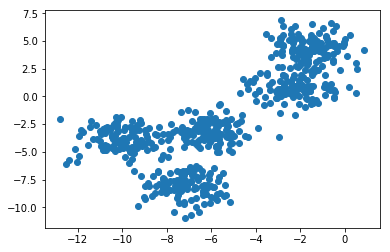

In [11]:
plt.scatter(X2[:, 0], X2[:, 1])

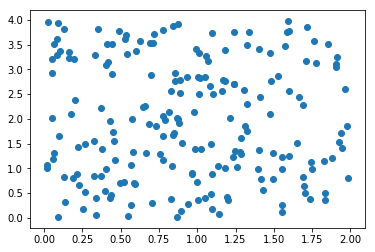

In [12]:
plt.scatter(X3[:, 0], X3[:, 1])

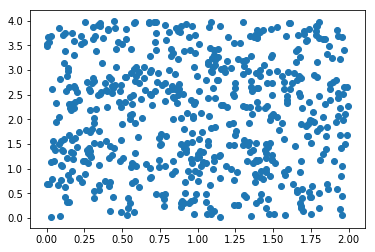

In [13]:
plt.scatter(X4[:, 0], X4[:, 1])

In [14]:
functions = {"random" : random, "kmpp" : kmpp}
generations = {"first blobs" : X1, "second blobs" : X2, "first random" : X3, "second random" : X4}
tests = 12
x = np.array([i for i in range(tests)], dtype = 'int')

### Для 2 центров

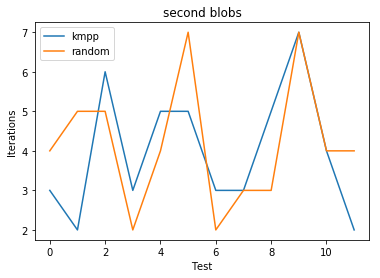

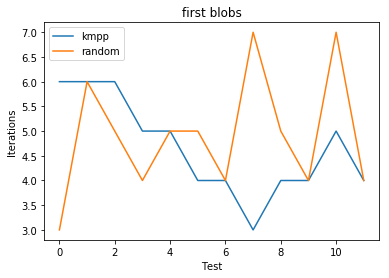

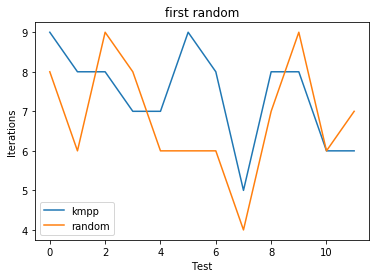

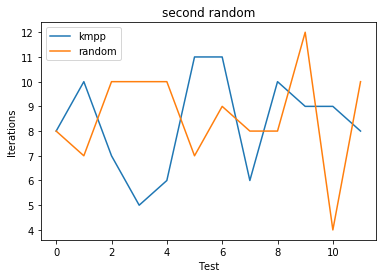

In [15]:
state = 0
for test in generations:
    for f in functions:
        y = np.array([], dtype = 'int')
        for i in range(tests):
            colors, dots, it = kmeans(generations[test], 2, state, functions[f])
            y = np.append(y, it)
            state += 1
        plt.plot(x, y, label = f)
    plt.title(test)
    plt.xlabel("Test")
    plt.ylabel("Iterations")
    plt.legend()
    plt.show()

### Для 5 центров

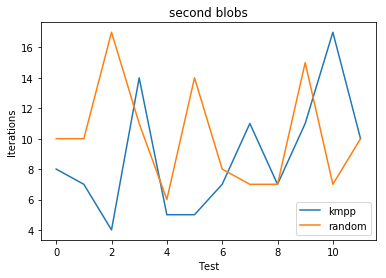

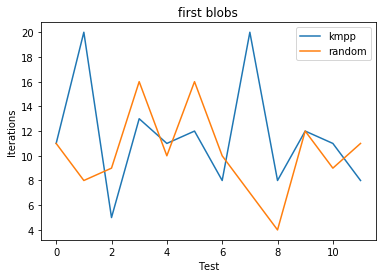

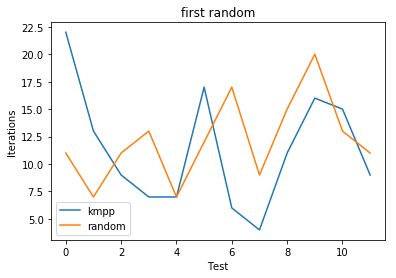

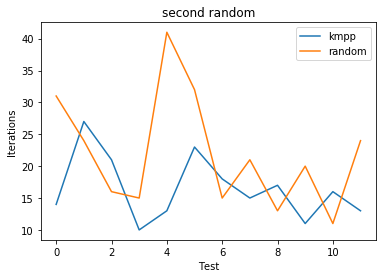

In [17]:
state = 13
for test in generations:
    for f in functions:
        y = np.array([], dtype = 'int')
        for i in range(tests):
            colors, dots, it = kmeans(generations[test], 5, state, functions[f])
            y = np.append(y, it)
            state += 1
        plt.plot(x, y, label = f)
    plt.title(test)
    plt.xlabel("Test")
    plt.ylabel("Iterations")
    plt.legend()
    plt.show()

### Вывод:
#### Как и ожидалось, в общей сложности для разных выборок, для маленького и большого кол-ва центров, методу KMPP (k-means++)  требуется меньше итераций для определения центров, чем методу, основанному на случайном выборе начальных центров. Лишь в небольшом количестве тестов RP потребовалось меньше итераций из-за удачной выборки центров, чем KMPP.

## 2. Для каких задач (выборок) подходит / не подходит

In [18]:
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles
from sklearn.datasets import make_hastie_10_2
from sklearn.datasets import make_blobs

### Выборка, сформированная при помощи функции make_circles

In [19]:
X, y = make_circles(n_samples = 200, random_state = 1)

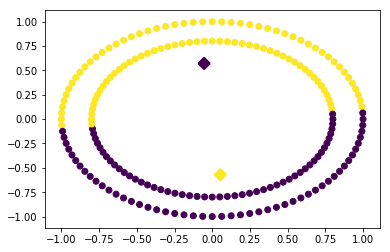

In [20]:
colors, dots, it = kmeans(X, 2, 0)
plt.scatter(X[:, 0], X[:, 1], c = colors)
plt.scatter(dots[:, 0], dots[:, 1], c = [len(dots) - i for i in range(len(dots))], marker = 'x', lw = 10)
plt.show()

### Выборка, сформированная при помощи функции make_moons

In [21]:
X, y = make_moons(n_samples = 150, random_state = 1)

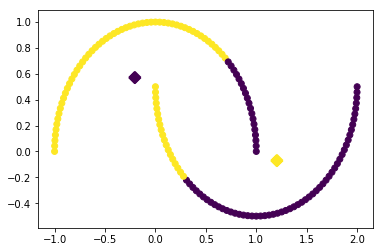

In [22]:
colors, dots, it = kmeans(X, 2, 0)
plt.scatter(X[:, 0], X[:, 1], c = colors)
plt.scatter(dots[:, 0], dots[:, 1], c = [len(dots) - i for i in range(len(dots))], marker = 'x', lw = 10)
plt.show()

### Выборка, сформированная при помощи функции make_hastie_10_2

In [23]:
X, y = make_hastie_10_2(n_samples = 1000, random_state = 1)

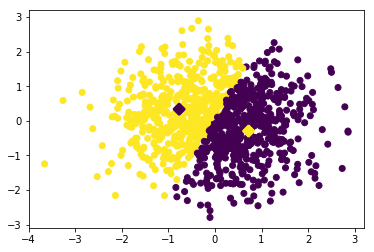

In [24]:
clusters_cnt_hastie = 2
colors, dots, it = kmeans(X, clusters_cnt_hastie, 2)
plt.scatter(X[:, 0], X[:, 1], c = colors)
plt.scatter(dots[:, 0], dots[:, 1], c = [len(dots) - i for i in range(len(dots))], marker = 'x', lw = 10)
plt.show()

### Выборка, сформированная при помощи функции make_blobs

In [25]:
areas = 4 # Выбираем кол-во областей, вокруг которых будут формироваться случайные точки 
X, y = make_blobs(n_samples = 250, centers = areas, random_state = 1)

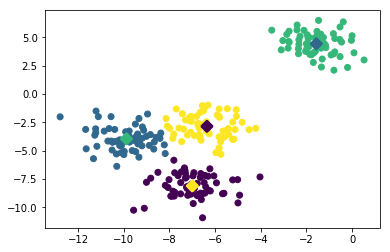

In [26]:
clusters_cnt_blobs = 4 # Кол-во центров
colors, dots, it = kmeans(X, clusters_cnt_blobs, 2)
plt.scatter(X[:, 0], X[:, 1], c = colors)
plt.scatter(dots[:, 0], dots[:, 1], c = [len(dots) - i for i in range(len(dots))], marker = 'x', lw = 10)
plt.show()

### Выборка, сформированная случайным образом

In [27]:
samples = 300 # Размер выборки
random_generation = generate(samples, 1)

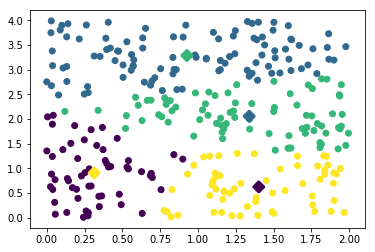

In [28]:
clusters_cnt_rand = 4
colors, dots, it = kmeans(random_generation, clusters_cnt_rand, 0)
plt.scatter(random_generation[:, 0], random_generation[:, 1], c = colors)
plt.scatter(dots[:, 0], dots[:, 1], c = [len(dots) - i for i in range(len(dots))], marker = 'x', lw = 10)
plt.show()

### Вывод:
#### 1. k-means не подходит для выборок, эквивалентных тем, которые сделаны при помощи функций make_circles и make_moons (при кол-во кластеров = 2), так как логично ожидать, что в 1 случае каждым из кластеров будет являться один из двух кругов, а во 2 случае - каждый полукруг. k-means же всегда определит кластеры иным образом.
#### 2. k-means подходит для выборок,  эквивалентных тем, которые сделаны при помощи функций make_hastie_10_2 и make_blobs. В 1 случае мы будем ожидать разделения заданной "кучи" на подкучи, что k-means и сделает. Во 2 случае мы также будем ожидать того, что k-means для каждой уже сформированной "кучи" (по факту точки, принадлежащие одной "куче", будут располагаться в пределах заданной для этой кучи окружности) сопоставит ей один кластер,  и никак иначе. Это k-means и сделает.
#### 3. k-means не совсем подходит для случайных выборок, так как кластеры могут формироваться любым способом и в любых формах, однако есть вероятность, что при разделении на кластеры при помощи k-means мы получим такой разбиение, которое хотели.

## 3. Стратегия выбора числа кластеров

Пусть n - число кластеров, $\mu_i$ - центр i-го кластера. Стратегией для выбора числа кластеров будет служить следующее число:

$K = \sum\limits_{i=1}^n\sum\limits_{x_j \in C_i} ||\mu_i - x_j||^2$ - суммарное расстояние всех точек выборки до центров кластеров, которым они принадлежат.

Чем это число меньше, тем ближе в общем случае каждая точка лежит к своему кластеру. То есть мы более точно распредилил точки на группы на основе их расстояния до центроида кластера. 

То есть стратегия выбора числа кластеров будет следующей: Чем меньше величина $K$ для соответствующего кол-ва кластеров, тем лучше данное число кластеров для соответствующей выборки.

In [29]:
def key(X, centers, identity): # identity[i] = номер кластера, которому принадлежит i-ая точка выборки
    K = 0
    for i in range(len(X)):
        K += np.abs(length([X[i][0], X[i][1]], [centers[identity[i]][0], centers[identity[i]][1]]))
    return K

### Выборка при помощи функции make_blobs

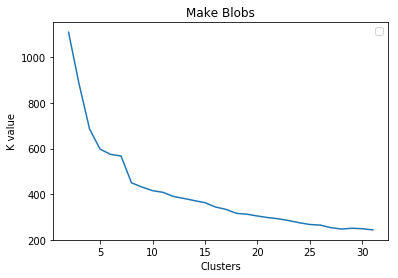

In [30]:
X, y = make_blobs(n_samples = 400, centers = 6, random_state = 0)
tests = 30
clusters = 2
state = 1
x = list()
y = list()
for i in range(tests):
    x.append(clusters)
    colors, dots, it = kmeans(X, clusters, state)
    num = key(X, dots, colors)
    y.append(num)
    clusters += 1
    
plt.title("Make Blobs")
plt.ylabel("K value")
plt.xlabel("Clusters")
plt.legend()
plt.plot(x, y)
plt.show()

### Случайная выборка

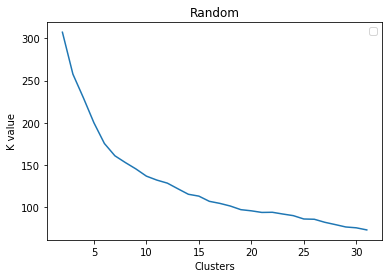

In [31]:
X = generate(400, 1)
tests = 30
clusters = 2
state = 1
x = list()
y = list()
for i in range(tests):
    x.append(clusters)
    colors, dots, it = kmeans(X, clusters, state)
    num = key(X, dots, colors)
    y.append(num)
    clusters += 1
    
plt.title("Random")
plt.ylabel("K value")
plt.xlabel("Clusters")
plt.legend()
plt.plot(x, y)
plt.show()

    Как видно из графиков, чем больше количество кластеров, тем меньше величина $K$, то есть качество кластеризации растет вместе с числом кластеров. Однако при росте числа кластеров также уменьшается информативность и уникальность, которая присуща каждому кластеру. То есть, в тоже время, чем больше число кластеров, тем меньше информации мы извлекаем из нашей выборки.

### Вывод:
#### Число кластеров следует выбирать на основе величины $K$: чем она меньше, тем эффективнее кластеризация. На основе исследования я получил, что уменьшение этой величины зависит от роста количества кластеров. Однако если их слишком много,  теряется информативность выборки. Поэтому алгоритм выбора числа кластеров следующий:
#### 1. Получить график зависимости величины $K$ от числа кластеров
#### 2. Найти такое число кластеров, начиная с которого при дальнейшем росте уменьшение величины $К$ становится незначительным (меньше какой-либо заданной изначально константы). Это и будет оптимальным числом кластеров для соответствующей выборки

## 4. Зависимость скорости настройки от обьема данных / сложности задачи

Проведем исследование на основе выборок, сделанных при помощи функций make_blobs.

In [32]:
import time

#### Зависимость количества итераций в функции k-means от размера выборки и количества кластеров

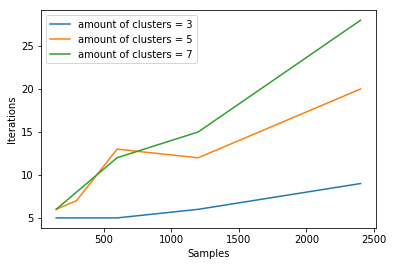

In [34]:
clusters = [3, 5, 7] # Число центров
shift = 2
tests = 5 # кол-во выборок
repeat = 12 # кол-во повторений одной выборки для более точного вывода кол-ва требуемых итераций и времени

# Формируем массив выборок с разным количеством точек (кол-во центров фиксированно и равно 3, 6 или 9)
for number in clusters:
    samples_arr = np.array([]) # массив, хранящий кол-во точек в каждой выборке 
    iterations = np.array([]) # массив, хранящий кол-во итераций, потребовавшихся kmeans для каждой выборки
    samples = 150 # начальное кол-во точке в выборке
    for i in range(tests):
        sum_it = 0
        for j in range(repeat):
            X, y = make_blobs(n_samples = samples, centers = 4, random_state = j) # кол-во центров фиксировано
            colors, dots, it = kmeans(X, number, j)
            sum_it += it
        iterations = np.append(iterations, sum_it / repeat)
        samples_arr = np.append(samples_arr, samples)
        samples *= shift # увеличиваем число точек в выборке
    plt.plot(samples_arr, iterations, label = "amount of clusters = " + str(number))

plt.legend()
plt.xlabel("Samples")
plt.ylabel("Iterations")
plt.show()

#### Зависимость времени работы k-means от размера выборки и количества кластеров

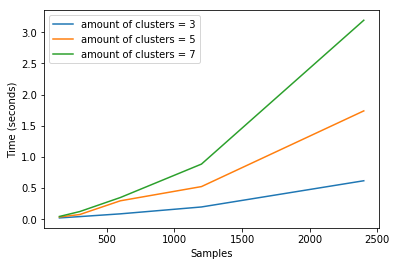

In [35]:
clusters = np.array([3, 5, 7]) # Число центров
shift = 2
tests = 5 # кол-во выборок
repeat = 12 # кол-во повторений одной выборки для более точного вывода кол-ва требуемых итераций и времени

# Формируем массив выборок с разным количеством точек (кол-во центров фиксированно и равно 3, 6 или 9)
for number in clusters:
    times = np.array([]) # Массив, хранящий время настройки для каждой выборки
    samples_arr = np.array([]) # массив, хранящий кол-во точек в каждой выборке 
    samples = 150
    for i in range(tests):
        sum_time = 0
        for j in range(repeat):
            X, y = make_blobs(n_samples = samples, centers = 4, random_state = j) # кол-во центров фиксировано
            start_time = time.time()
            colors, dots, it = kmeans(X, number, j) # возьмем на один центр больше, чем сформировала ф-ция make blobs
            full_time = time.time() - start_time
            sum_time += full_time
        times = np.append(times, sum_time / repeat)
        samples_arr = np.append(samples_arr, samples)
        samples *= shift # увеличиваем число точек в выборке
    plt.plot(samples_arr, times, label = "amount of clusters = " + str(number))

plt.legend()
plt.xlabel("Samples")
plt.ylabel("Time (seconds)")
plt.show()

### Вывод:

1. Из графиков зависимости количества итераций видно, что увеличение размера выборки при фиксированном количестве кластеров влияет тем больше, чем выше количество кластеров. Увеличение же количества кластеров, даже с небольшщой выборкой, заметно влияет на необходимое количество итераций для настройки.

2. Из графиков зависимости времени, требующегося на настройку, видно, что увеличение размера выборки оказывает несущественное влияние на время работы k-means при небольшом количестве кластеров. При увеличении количества кластеров совместно с увеличением размера выборки значительно повышается время настройки. 